# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0381 Короткина Елизавета, Магнитов Сергей и Сарычева Александра. Вариант №6.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Формула численного дифференцирования 1-го порядка.
$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

$$H(\omega) = i\cdot sin(\omega)$$

Формула прямоугольников для численного интегрирования.

$$y_{n+1}=y_{n}+s_{n+\frac{1}{2}}$$
$$y_0=0$$

$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$


Формула трапеций для численного интегрирования.

$$y_{n+1}=y_{n}+\frac{1}{2}(s_{n}+s_{n+1})$$
$$y_0=0$$

$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$

Формула Симпсона для численного интегрирования.

$$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$$
$$y_0=0$$

$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.


1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$. Частота каждой из гармоник не должна превышать π. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $π$, изменяющимися с шагом $Δω=0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям H(ω). Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров:
  
  a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

  b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.


## Выполнение работы


**0. Инициализация данных.**

Загрузка библиотек.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings

**1. Формирование дискретного сигнала посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид.**

Для начала необходимо создать аналоговый сигнал, который далее будет дискретизирован. По условию аналоговый сигнал должен иметь следующий вид:

$$s(t) = \displaystyle\sum_{k} A_k \cdot cos(\omega_kt+\varphi_k)$$

Значение $A_k$ определяется случайным образом из диапазона целых чисел от 1 до 11. Параметр $\varphi_k$ является случайной величиной из промежутка от 0 до 0.5. Численное значение $\omega_k$ изменяется в пределах от 0 до $\pi$ с шагом $Δω=0.1\pi$. Чтобы отнормировать аналоговый сигнал, было выполнено деление на сумму коэффициентов $A_k$. Чтобы получить как можно более приближенный сигнал к аналоговому с помощью программных средств в коде были использованы 512 точек.

In [170]:
def Analog_Signal():
  A = []
  phi = []
  w = []
  y = np.linspace(0, 0, 512)
  x = np.linspace(0, 31, 512)
  for i in range(11):
    A.append(random.randint(1, 11))
    phi.append(random.uniform(0, 0.5))
    w.append(0.1*i*np.pi)

  for A_i, phi_i, w_i in zip(A, phi, w):
    y += A_i*np.cos(np.array(w_i*x) + phi_i)

  y = y/sum(A)
  return x, y

Далее была проведена дискретизация этого сигнала. Полученная последовательность включает в себя 32 отсчёта. Для этого была выбрана каждая шестнадцатая точка аналогового сигнала, полученного программным способом.

In [171]:
def Discrete_Signal(y):
  discrete_y = np.linspace(0, 0, 32)
  for i in range(31):
    discrete_y[i] = y[i*16]
  return discrete_y

**2. Визуализация аналогового и дискретного сигналов.**

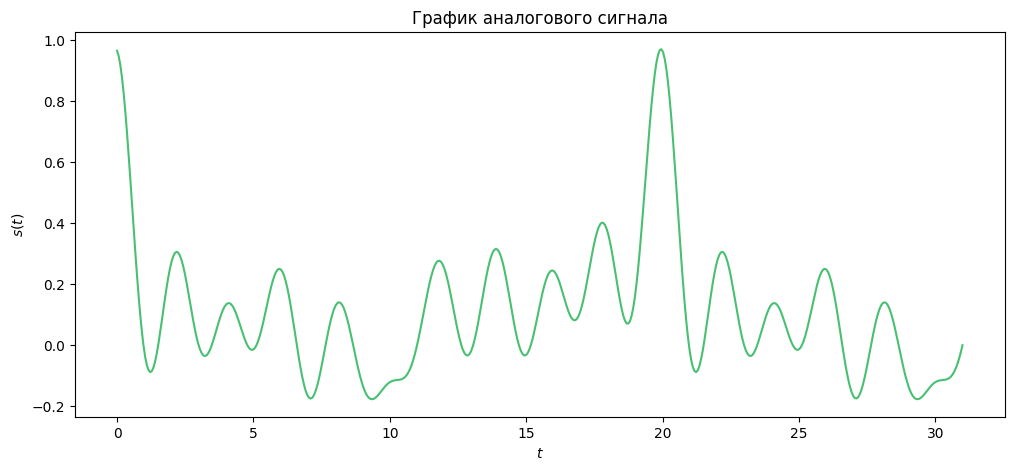

In [172]:
analog_x, analog_y = Analog_Signal()
plt.figure(figsize=(12, 5))
plt.title("График аналогового сигнала")
plt.ylabel('$s(t)$')
plt.xlabel(r'$t$')
plt.plot(analog_x, analog_y, color="#48c072")

<StemContainer object of 3 artists>

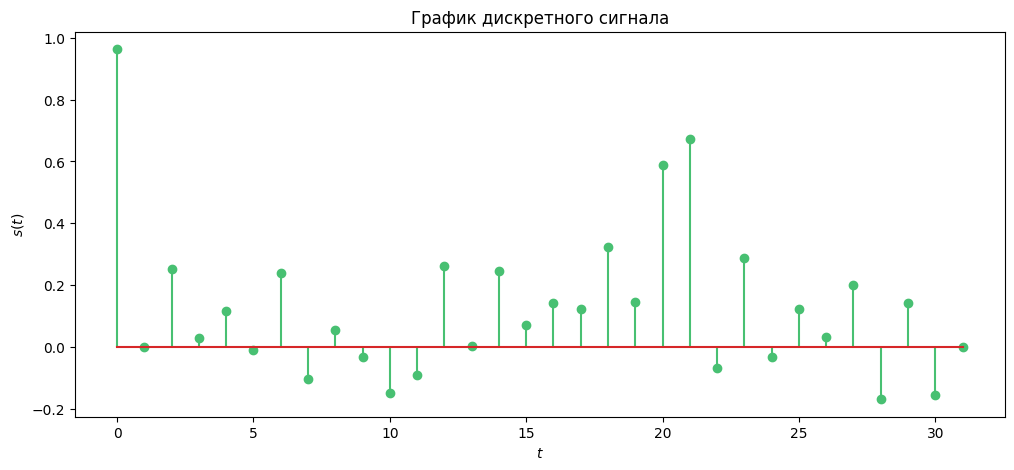

In [173]:
discrete_x = np.linspace(0, 31, 32)
discrete_y = Discrete_Signal(analog_y)
plt.figure(figsize=(12, 5))
plt.title("График дискретного сигнала")
plt.ylabel('$s(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, discrete_y, linefmt="#48c072")

**3. Нахождение спектра дискретного сигнала с помощью дискретного преобразования Фурье. Визуализация спектра.**

Дискретный сигнал может быть представлен в следующем виде:

$$s(t)=\displaystyle\sum_{k} x_k \delta(t-k)$$

Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде следующей функции:

$$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$$

Получение спектра позволяет изучить амплитудную частотную характеристику:  с какими амплитудами использовались косинусоиды при формировании сигнала.

Спектр является переодической функцией, а также симметричен относительно нулевой частоты, что подтверждается на графике.

In [174]:
def Signal_spectrum(set_w, set_y):
  S = 0
  for i in range(len(set_y)):
    S += set_y[i]*np.exp(-1j*set_w*i)
  return S

<StemContainer object of 3 artists>

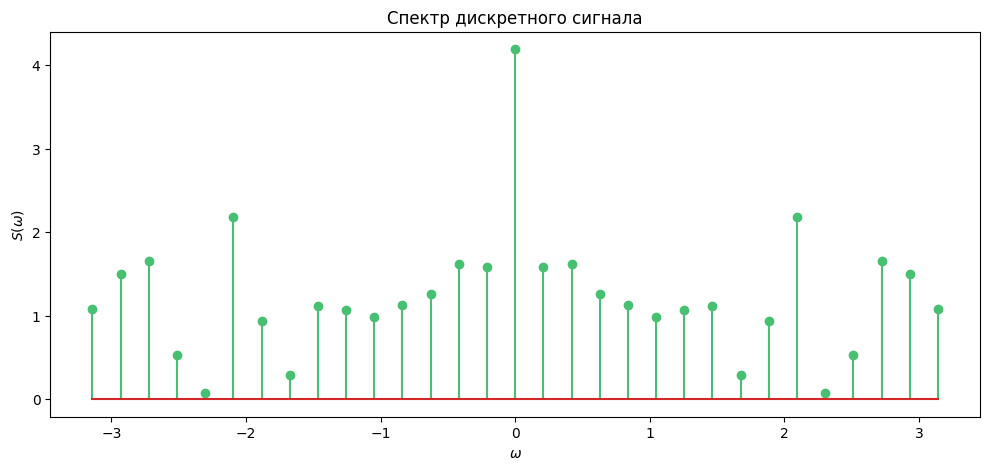

In [175]:
current_w = np.linspace(-np.pi, np.pi, 31)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072")

**4. Приминение линейного сглаживания по 5-ти и 9-ти точкам для дискретного сигнала.**

Сглаживание по 5-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$$

Сглаживание по 9-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$$

К дискретному сигналу были применены рассмотренные формулы линейного сглаживания для той области, в которой это было возможно, а для крайних участков была произведена аппроксимация.

In [176]:
def linear_smoothing_5(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(2, len(set_y)-2):
    new_y[i] = (set_y[i-2] + set_y[i-1] + set_y[i] + set_y[i+1] + set_y[i+2])/5
  return new_y

In [177]:
def linear_smoothing_9(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(4, len(set_y)-4):
    new_y[i] = (set_y[i-4] + set_y[i-3] + set_y[i-2] + set_y[i-1] + set_y[i] + set_y[i+4] + set_y[i+3] + set_y[i+2] + set_y[i+1])/9
  return new_y

In [178]:
sm_discrete_y5 = np.convolve(discrete_y, np.ones(5), 'same') / 5
sm_discrete_y9 = np.convolve(discrete_y, np.ones(9), 'same') / 9

**5. Визуализация дискретного сигнала после фильтрации с помощью линейного сглаживания.**

<StemContainer object of 3 artists>

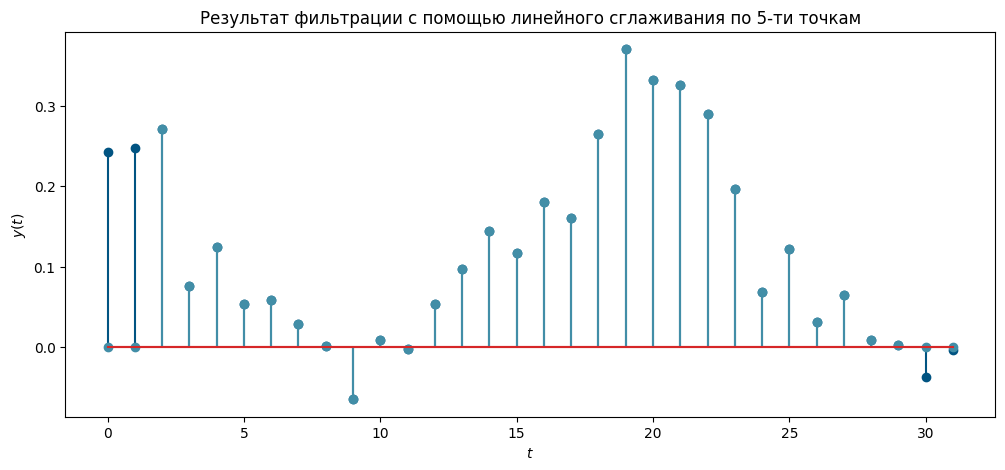

In [179]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью линейного сглаживания по 5-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, linear_smoothing_5(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

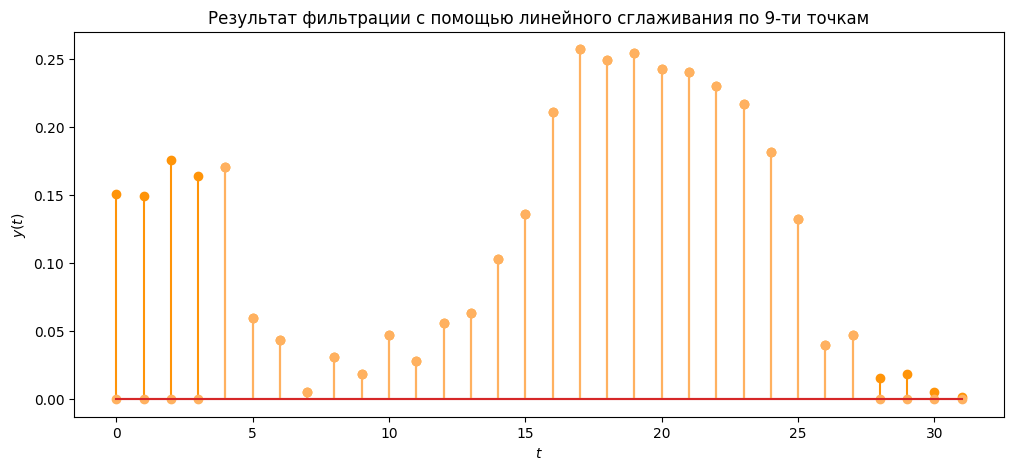

In [180]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью линейного сглаживания по 9-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, linear_smoothing_9(discrete_y), linefmt="#FFB160")

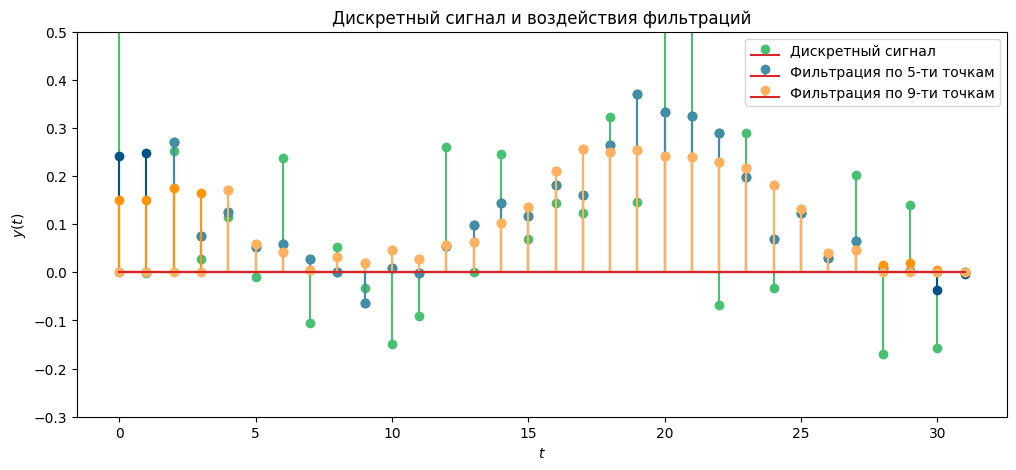

In [181]:
plt.figure(figsize=(12, 5))
plt.title("Дискретный сигнал и воздействия фильтраций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.ylim(-0.3, 0.5)
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, linear_smoothing_5(discrete_y), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, linear_smoothing_9(discrete_y), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

**6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.**

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

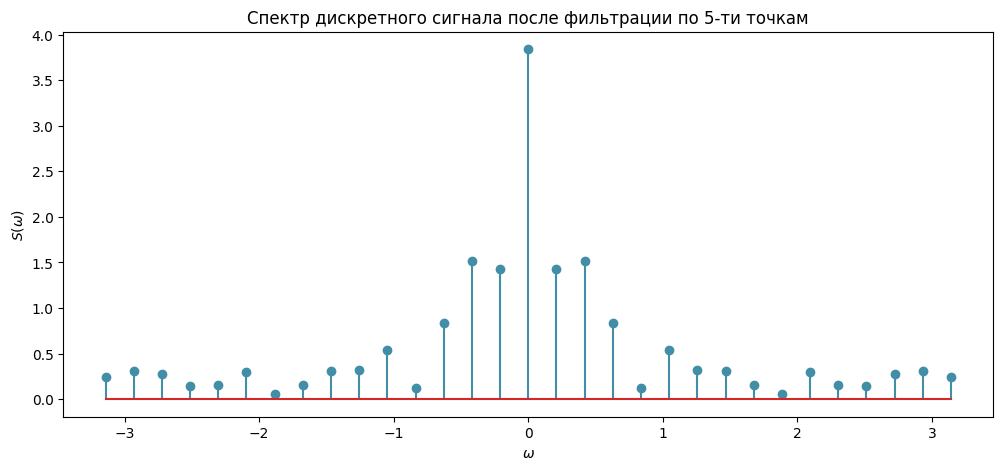

In [182]:
current_w = np.linspace(-np.pi, np.pi, 31)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 5-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7")

<StemContainer object of 3 artists>

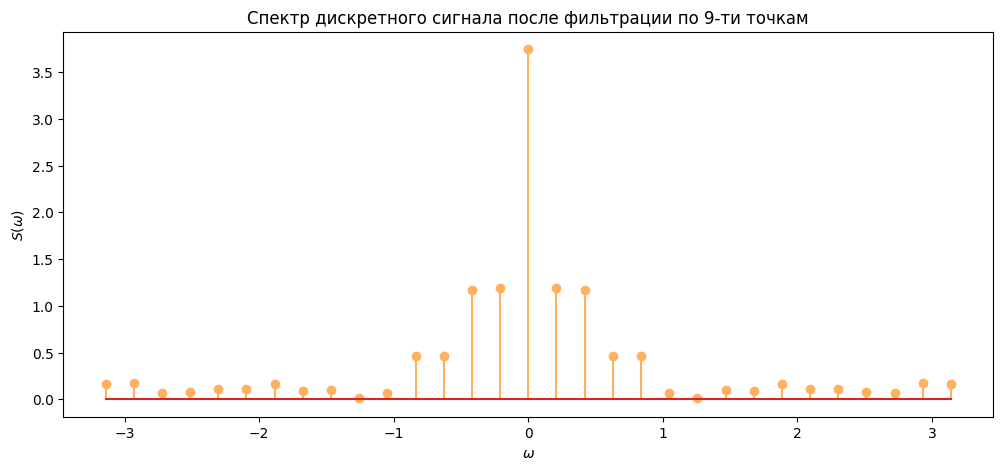

In [183]:
current_w = np.linspace(-np.pi, np.pi, 31)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 9-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160")

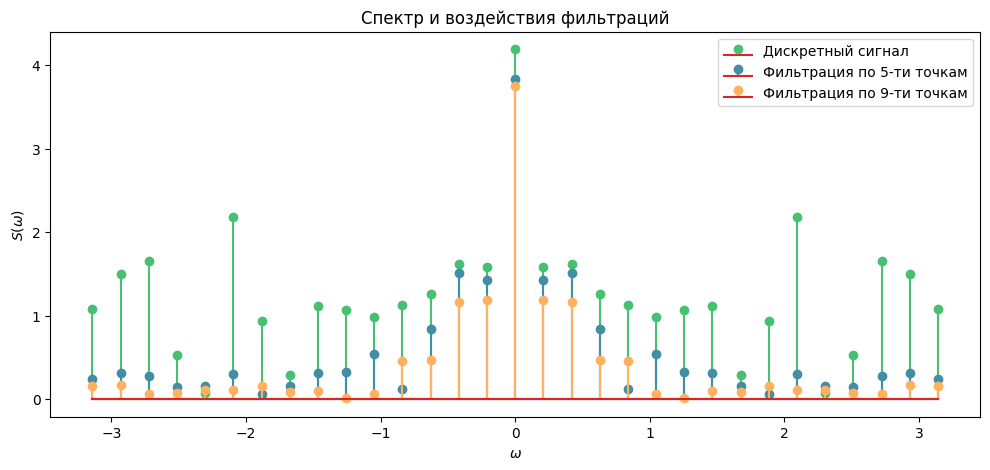

In [184]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействия фильтраций")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

**7. Анализ результатов.**

По графикам видно, что фильтрации уменьшили амплитуды сигналов в частотной области, достаточной далекой от 0. В районе нулевого значения частоты сигнал подавлялся не так сильно. Полученные выводы и полоса пропускания сигнала согласуются с выводами, сделанными относительно $H(\omega)$ в предыдущем исследовании.

**8.a. Исследование дискретного фильтра, соответствующего численному дифференцированию 1-го порядка.**

*8.a.4. Применение дискретного фильтра, соответствующего численному дифференцированию 1-го порядка.*

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega) = \frac{e^{i\omega}-e^{-i\omega}}{2}=i\cdot sin(\omega)$$

К дискретному сигналу была применена рассмотренная формулы дискретного фильтра для той области, в которой это было возможно, а для крайних участков была произведена аппроксимация.

In [185]:
def derivate(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(1, len(set_y)-1):
    new_y[i] = (set_y[i+1]-set_y[i-1])/2
  return new_y

In [186]:
sm_discrete_derivate = np.convolve(discrete_y, np.array([1, 0, -1]), 'same') / 2

*8.a.5. Визуализация дискретного сигнала после фильтрации с помощью дискретного фильтра, соответствующего численному дифференцированию 1-го порядка..*

<StemContainer object of 3 artists>

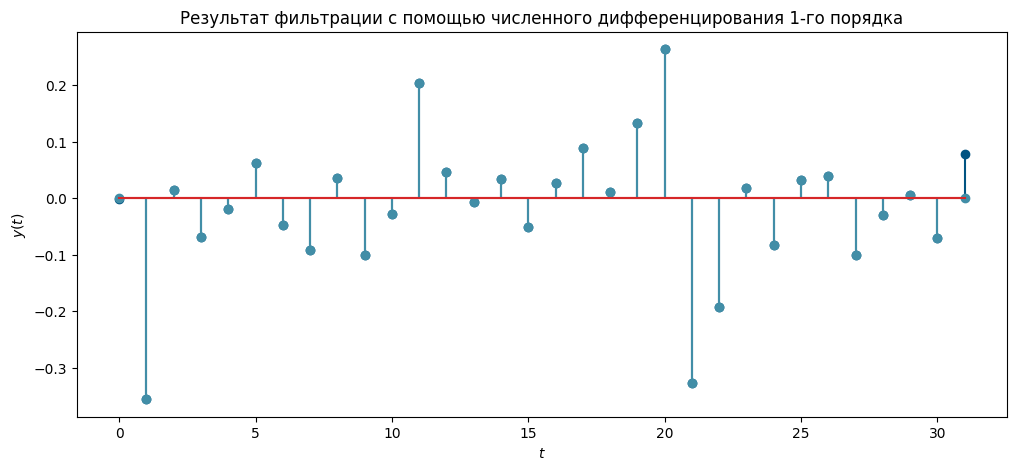

In [187]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью численного дифференцирования 1-го порядка")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_derivate, linefmt="#015482")
plt.stem(discrete_x, derivate(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

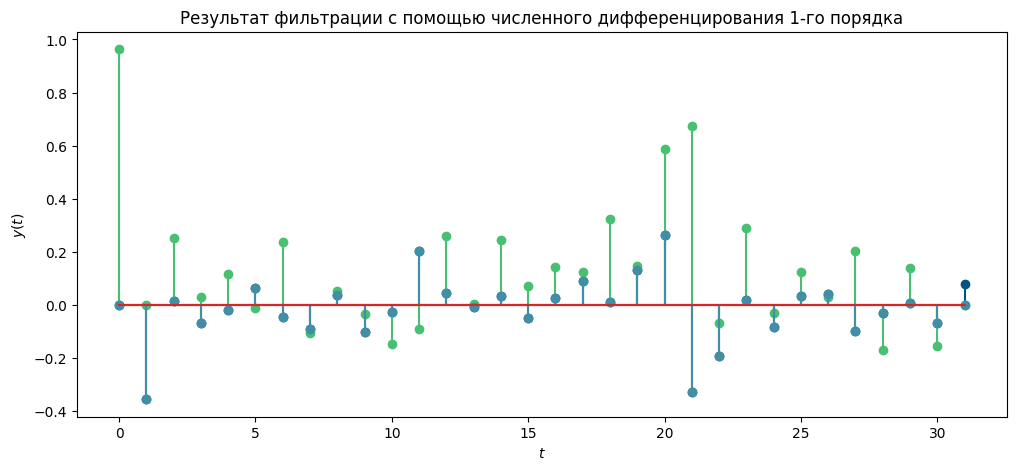

In [188]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью численного дифференцирования 1-го порядка")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_derivate, linefmt="#015482")
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, derivate(discrete_y), linefmt="#428EA7", label="Численное дифференцирование")

*8.a.6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.*

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

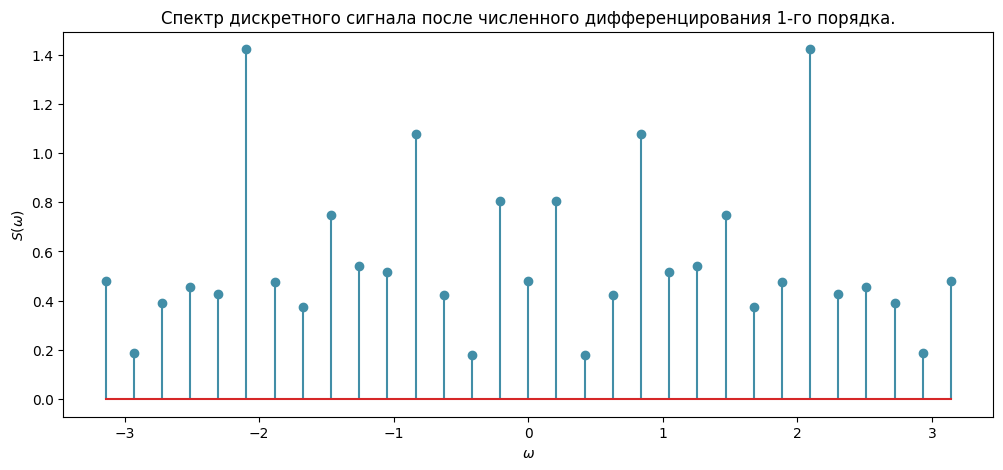

In [189]:
current_w = np.linspace(-np.pi, np.pi, 31)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после численного дифференцирования 1-го порядка.")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_derivate)), linefmt="#428EA7")

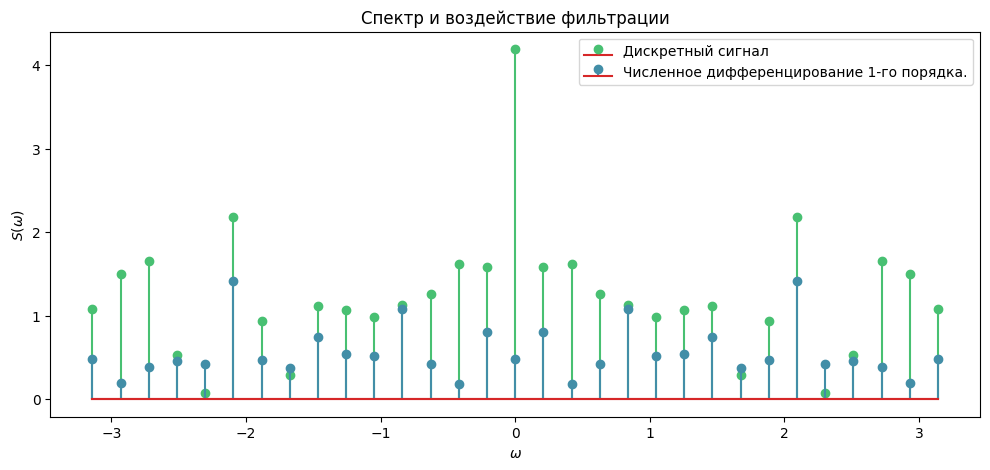

In [190]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействие фильтрации")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_derivate)), linefmt="#428EA7", label="Численное дифференцирование 1-го порядка.")
plt.legend()

*8.a.7. Анализ результатов.*

Таким образом, видно, что фильтр, являющийся численным дифференцированием, оказывает очень сильное влияние на поступивший дискретный сигнал. По графику спектра видно, что в большинстве случаев амплитуда синусоид на каждой частоте затухает. Наиболее нейтральное действие оказывается на средние частоты, в то время как низкие и высокие подавляются.

**8.b. Исследование дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).**

*8.b.4. Применение дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).*

Формула прямоугольников:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}$$

Передаточная функция для формулы прямоугольников:

$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$

Формула трапеций:

$$y_{n+1} = y_n + \frac{s_n+s_{n+1}}{2}$$

Передаточная функция для формулы трапеций:

$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$

Формула Симпсона:

$$y_{n+1} = y_{n-1}+\frac{s_{n-1}+4s_n+s_{n+1}}{3}$$

Передаточная функция для формулы Симпсона:

$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$


In [191]:
def rectangle(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(1, len(set_y)):
    new_y[i] = new_y[i-1] + set_y[i]
  return new_y

In [192]:
def trapezoid(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(1, len(set_y)):
    new_y[i] = new_y[i-1] + (set_y[i-1]+set_y[i])/2
  return new_y

In [193]:
sm_discrete_simpson = np.convolve(discrete_y, np.array([1, 4, 1]), 'same')/3

In [194]:
def Simpson(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(2, len(set_y)):
    new_y[i] = new_y[i-2] + set_y[i-1]
  return new_y

*8.b.5. Визуализация дискретного сигнала после применения дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона).*

<StemContainer object of 3 artists>

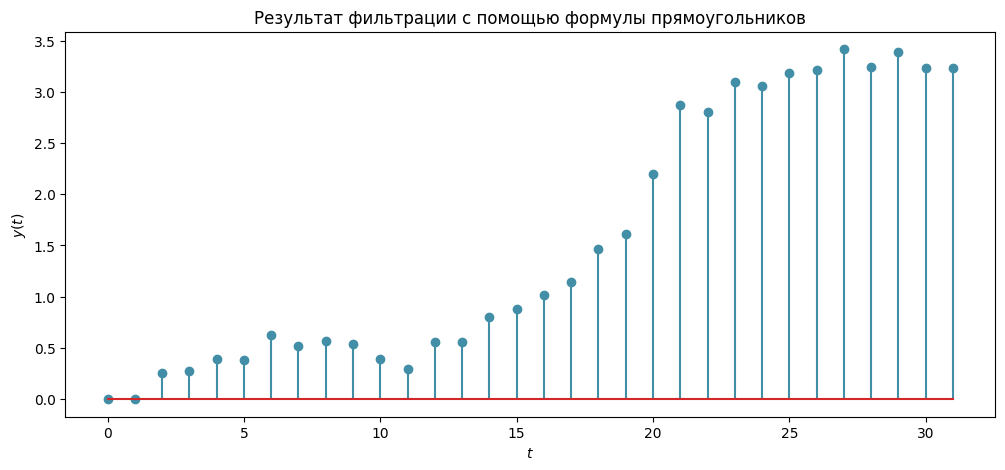

In [195]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью формулы прямоугольников")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, rectangle(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

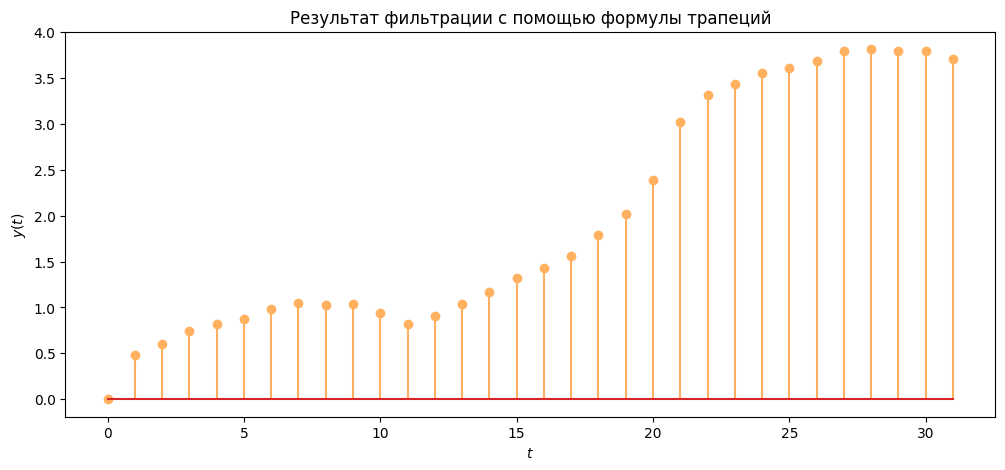

In [196]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью формулы трапеций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, trapezoid(discrete_y), linefmt="#FFB160")

<StemContainer object of 3 artists>

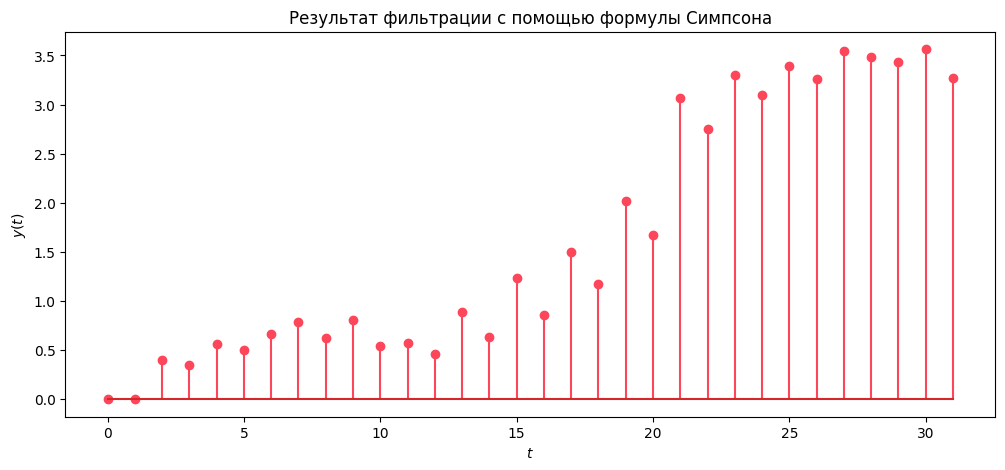

In [197]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью формулы Симпсона")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, Simpson(sm_discrete_simpson), linefmt="#fd4659")

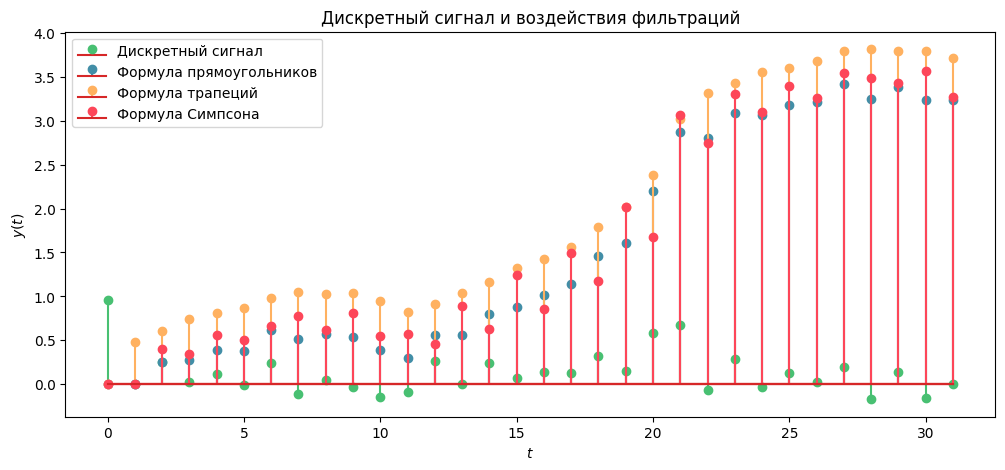

In [198]:
plt.figure(figsize=(12, 5))
plt.title("Дискретный сигнал и воздействия фильтраций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, rectangle(discrete_y), linefmt="#428EA7", label="Формула прямоугольников")
plt.stem(discrete_x, trapezoid(discrete_y), linefmt="#FFB160", label="Формула трапеций")
plt.stem(discrete_x, Simpson(sm_discrete_simpson ), linefmt="#fd4659", label="Формула Симпсона")
plt.legend()

*8.b.6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.*

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

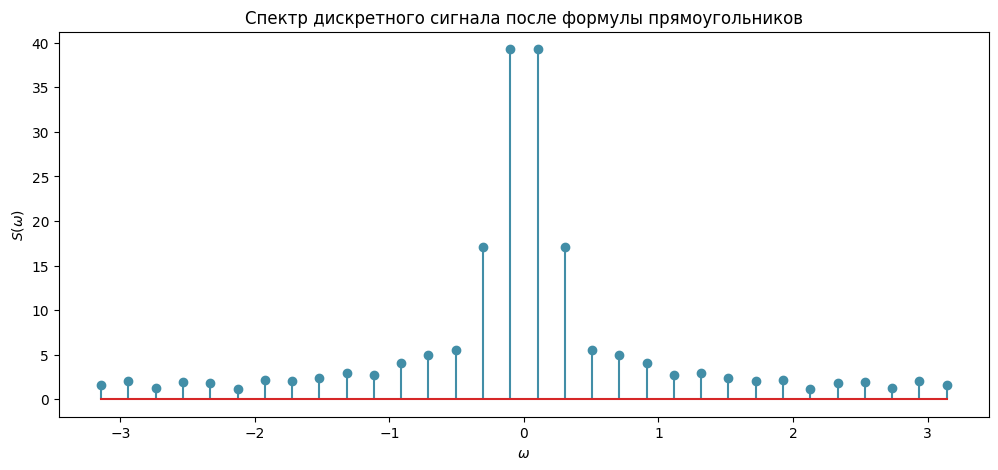

In [199]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после формулы прямоугольников")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, rectangle(discrete_y))), linefmt="#428EA7")

<StemContainer object of 3 artists>

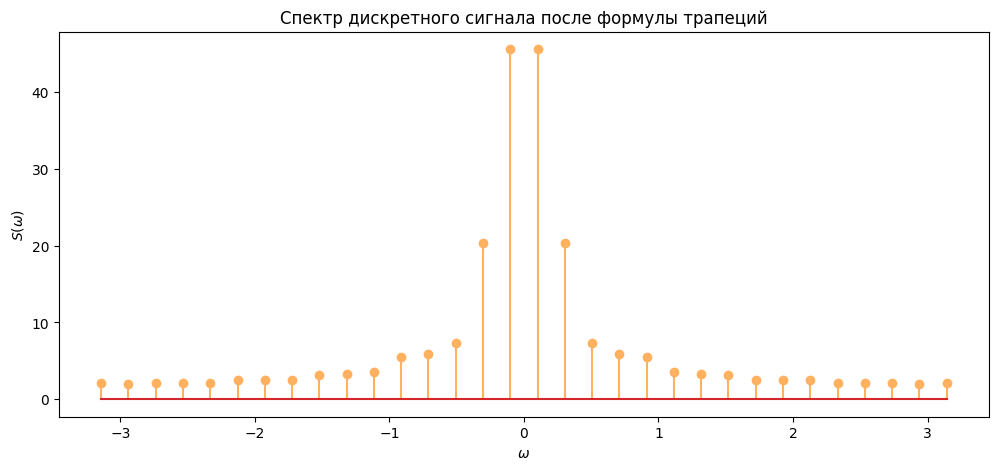

In [200]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после формулы трапеций")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, trapezoid(discrete_y))), linefmt="#FFB160")

<StemContainer object of 3 artists>

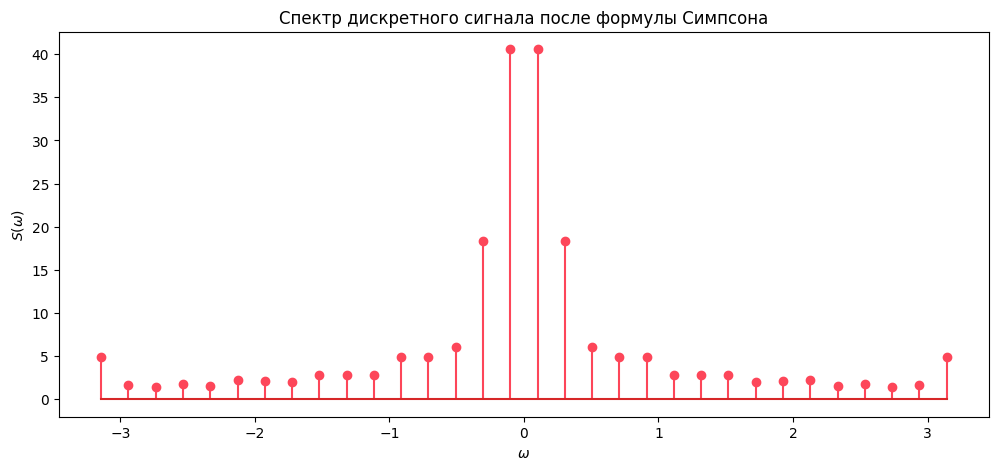

In [201]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после формулы Симпсона")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, Simpson(sm_discrete_simpson))), linefmt="#fd4659")

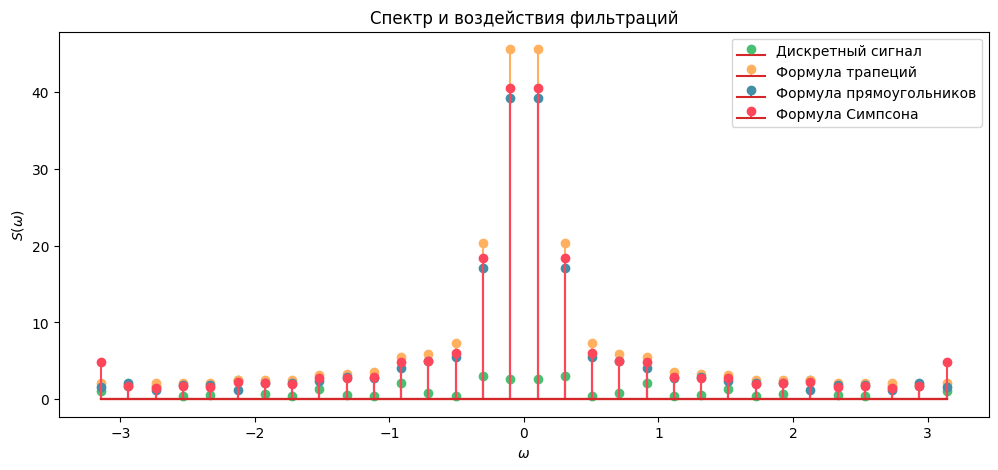

In [202]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействия фильтраций")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, trapezoid(discrete_y))), linefmt="#FFB160", label="Формула трапеций")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, rectangle(discrete_y))), linefmt="#428EA7", label="Формула прямоугольников")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, Simpson(sm_discrete_simpson))), linefmt="#fd4659", label="Формула Симпсона")
plt.legend()

*8.b.7. Анализ результатов.*

Таким образом, по графикам спектров дискретных сигналов, к которым были применены фильтры, видна следующая тенденция: с увеличением частоты фильтры, основанные на формулах прямоугольников и Симпсона, усиливают сигнал, но их влияние также очень заметно и в области нулевой частоты; в отличие от них дискретный фильтр, основанный на формуле трапеций, оказывает наибольшее влияния на небольших частотах, а затем его влияние затухает. Полученные показания согласуются с характером поведения $H(\omega)$.

**9. Анализ результатов по всем пунктам.**

После исследования дискретных фильтров и наглядной визуализации можно провести анализ их действия. Так, фильтр, работающий на основе численного дифференцирования 1-го порядка, оказывает в основном затухающий эффект на силу сигнала в его частотной области. В отличие от него дискретные фильтры, являющиеся численным интегрированием, в основном увеличивают амплитуды сигналов, используемых при линейной комбинации для построения сложного сигнала. Но и их влияние разнится в зависимости от частот: в то время как формула прямоугольников и формула Симпсона усиливают сигнал практически на всей области, формула трапеций наиболее эффективно увеличивает амплитуды на низких частотах. Таким образом, каждый из фильтров необходимо использовать в зависимости от нужд и задач обработки сигналов.

## Выводы

В ходе выполнения практической работы был смоделирован аналоговый сигнал, который является линейной комбинацией косинусоид. Данный сигнал был дискретизирован, а затем изучен его спектр, полученный с помощью дискретных преобразований Фурье. К дискретизированному сигналу были применены разные дискретные фильтры, представляющие собой сглаживание, численное дифференцирование 1-го порядка и численное интегрирование (формула прямоугольников, формула трапеций, формула Симпсона). Каждый из фильтров был применен к начальному дискретному сигналу, после чего визуализирован новый полученный сигнал, его спектр, а также был проведен сравнительный анализ влияния фильтров на сигнал.